In [1]:
import numpy as np

# Matrix Creation and Initial Operations

## Matrix Initialization

In [2]:
A = np.random.randint(0,10,9).reshape(3,3)
A

array([[2, 4, 8],
       [7, 4, 6],
       [1, 5, 9]], dtype=int32)

In [3]:
B = np.random.randint(0,10,9).reshape(3,3)
B

array([[9, 8, 8],
       [6, 2, 7],
       [4, 5, 7]], dtype=int32)

In [4]:
I = np.identity(3)
I

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [5]:
diag_values= [2,3,4]
D= np.diag(diag_values)
D

array([[2, 0, 0],
       [0, 3, 0],
       [0, 0, 4]])

### 1. Construct  a combined matrix C

In [6]:
A_transpose = A.T
A_inv = np.linalg.inv(A)
B_transpose = B.T
D_inv = np.linalg.inv(D)
A_square = np.linalg.matrix_power(A,2)

In [7]:
C = (A * B + A_transpose) + (np.dot(A,B) + A_transpose) +((np.dot(A,B)-B_transpose) + (A_square + I)) + (np.dot(A_inv, B_transpose)+ (np.dot(A,B))) + (np.dot((np.dot(A, A_transpose)),A_inv))+ (np.dot(A+B, A-B))+(np.dot(D_inv,A)+np.dot(D, A_inv))+(np.dot(A,B)+np.dot(B,A))

In [8]:
C

array([[288.9375    , 467.125     , 816.625     ],
       [350.64583333, 519.95833333, 906.9375    ],
       [318.34375   , 440.5625    , 784.3125    ]])

# Fundamental Matrix Analysis

## Core Linear Algebra Operations

### Basic Transformation

In [9]:
C_transpose = C.T
C_transpose

array([[288.9375    , 350.64583333, 318.34375   ],
       [467.125     , 519.95833333, 440.5625    ],
       [816.625     , 906.9375    , 784.3125    ]])

In [10]:
np.allclose(C, C_transpose, rtol=1e-5)

False

In [11]:
np.allclose(C, -C_transpose, rtol=1e-5)

False

### Determinant and Linear Independence

In [12]:
C_determinant = np.linalg.det(C)
C_determinant

np.float64(-235421.44108072776)

In [13]:
C_rank = np.linalg.matrix_rank(C)
C_rank

np.int64(3)

In [14]:
result = C_rank == 3
result
    

np.True_

In [15]:
C.shape[1]

3

In [16]:
nullity = C.shape[1] - C_rank
nullity

np.int64(0)

### Matrix Inverse Operations

In [17]:
C_inv = np.linalg.inv(C)

In [18]:
C_dot = (np.dot(C, C_inv))
result = np.allclose(C_dot, I)
result

True

In [19]:
C_pseudo_inv = np.linalg.pinv(C)
C_pseudo_inv

array([[-0.03503151,  0.02802474,  0.00406842],
       [-0.0582019 ,  0.14166157, -0.10321022],
       [ 0.04691196, -0.0909488 ,  0.05759872]])

In [20]:
result = C_inv == C_pseudo_inv
result

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

### Eigenvalue Analysis

In [21]:
eigenvalues, eigenvectors = np.linalg.eig(C)
print(eigenvalues, eigenvectors)

[1617.02819561  -28.8638514     5.04398912] [[-0.55581646 -0.91540548 -0.0930631 ]
 [-0.62796828 -0.07015395 -0.84996757]
 [-0.5447237   0.39637259  0.51855027]]


In [22]:
np1 = C @ eigenvectors
np2 = eigenvalues * eigenvectors
np.allclose(np1,np2)

True

In [23]:
trace_ = np.trace(C)
trace_

np.float64(1593.2083333333333)

In [24]:
det_ = np.prod(eigenvalues)
det_

np.float64(-235421.44108072796)

In [25]:
diag_elem= np.diag(C)

In [26]:
np.allclose(diag_elem, trace_)

False

### Linear System Solution

In [27]:
b_transpose = np.array([[1,2,3]])
b_transpose

array([[1, 2, 3]])

In [28]:
b = np.transpose(b_transpose)
b

array([[1],
       [2],
       [3]])

In [29]:
x = np.linalg.solve(C,b)
x

array([[ 0.03322325],
       [-0.08450942],
       [ 0.03781053]])

In [30]:
C_x = np.dot(C,x)

In [31]:
np.allclose(C_x,b)

True

In [32]:
x2= C_inv @ b

In [33]:
x2

array([[ 0.03322325],
       [-0.08450942],
       [ 0.03781053]])

In [34]:
x3 = np.linalg.lstsq(C,b, rcond= None)
x3

(array([[ 0.03322325],
        [-0.08450942],
        [ 0.03781053]]),
 array([], dtype=float64),
 np.int32(3),
 array([1759.00587726,   29.56035596,    4.52761056]))

### Matrix Decompositon

In [35]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
from scipy.linalg import lu,qr,cholesky

In [37]:
P, L, U= lu(C)
print(P)
print(L)
print(U)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
[[ 1.          0.          0.        ]
 [ 0.82401521  1.          0.        ]
 [ 0.90787832 -0.81446179  1.        ]]
[[350.64583333 519.95833333 906.9375    ]
 [  0.          38.67142475  69.29470545]
 [  0.           0.          17.36149655]]


In [38]:
Q, R = qr(C)
print(Q)
print(R)

[[-0.52081517  0.75442887  0.39948546]
 [-0.63204558 -0.02622176 -0.77448745]
 [-0.57382048 -0.65585783  0.49049012]]
[[ -554.77934578  -824.72693805 -1448.59110192]
 [    0.            49.83199869    77.90648527]
 [    0.             0.             8.51564255]]


In [39]:
np.allclose(C, C_transpose)

False

In [40]:
np.all(eigenvalues>0)

np.False_

In [41]:
##Cholesky Decomposition can not be done

### Matrix Norms and Conditioning

In [42]:
fro_norm = np.linalg.norm(C, 'fro')
fro_norm

np.float64(1759.2600689283743)

In [43]:
one_norm = np.linalg.norm(C,1)
one_norm

np.float64(2507.875)

In [44]:
inf_norm = np.linalg.norm(C, np.inf)
inf_norm

np.float64(1777.5416666666667)

In [45]:
two_norm = np.linalg.norm(C,2)
two_norm

np.float64(1759.0058772567704)

In [46]:
np.linalg.cond(C)

np.float64(388.5064440825874)

### Advanced Matrix Functions

In [47]:
from scipy.linalg import expm,logm,sqrtm,sinm,cosm

In [48]:
np3 = expm(C)
np3

d:\GEN_AI\Data_Science\Pandas\Data_Analysis\Used_Car_Price_Prediction\env\Lib\site-packages\scipy\linalg\_matfuncs.py:389: RuntimeWarning: overflow encountered in matmul
  eAw = eAw @ eAw
d:\GEN_AI\Data_Science\Pandas\Data_Analysis\Used_Car_Price_Prediction\env\Lib\site-packages\scipy\linalg\_matfuncs.py:389: RuntimeWarning: invalid value encountered in matmul
  eAw = eAw @ eAw


array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]])

In [49]:
np.all(eigenvalues>0)

np.False_

In [50]:
## no log
np4 = logm(C)
np4

array([[4.19654246+2.63034243j, 1.00076222-1.1303845j ,
        2.10310225-1.38077711j],
       [1.37486549+0.20158163j, 3.40990085-0.08662931j,
        3.18356637-0.10581865j],
       [0.46311161-1.13894406j, 1.86769309+0.48945898j,
        4.76268924+0.59787953j]])

In [51]:
np5 = sqrtm(C)
np5

array([[ 7.72056773+4.49820826j, 11.52274875-1.93309618j,
        19.86973024-2.36129826j],
       [ 8.16575388+0.34472931j, 14.41335848-0.14814674j,
        21.40947736-0.18096288j],
       [ 8.02250787-1.94773408j, 10.15090545+0.8370349j ,
        20.32424561+1.02244734j]])

In [52]:
np6 = sinm(C)
np6

array([[ 0.64557227, -0.05375351,  0.19744177],
       [ 0.47365258, -0.43727361,  0.91808795],
       [-0.21705073,  0.7107199 ,  0.18048096]])

In [53]:
np7 = cosm(C)
np7

array([[-0.82765941,  0.14715683,  0.03424294],
       [-0.28289816,  0.05346472, -0.49676282],
       [ 0.2383588 , -0.44391571, -0.3592982 ]])

### Matrix Powers and Products


In [54]:
np8 = C @ C_transpose
np8

array([[ 968567.03515625, 1084828.10286458,  938268.40039062],
       [1084828.10286458, 1215844.79774306, 1052022.47070312],
       [ 938268.40039062, 1052022.47070312,  910584.15722656]])

In [55]:
np9 = C_transpose @ C
np9

array([[ 307780.12250434,  457541.47113715,  803648.42382813],
       [ 457541.47113715,  682657.75043403, 1198574.33984375],
       [ 803648.42382813, 1198574.33984375, 2104558.1171875 ]])

In [56]:
np.allclose(np8,np9)

False

In [57]:
# It proves the non commutativity of the matrix ie, A.B != B.A



In [58]:
np10 = np.linalg.matrix_power(C,3)
np10

array([[8.19087151e+08, 1.19325842e+09, 2.10289687e+09],
       [9.25435917e+08, 1.34814901e+09, 2.37586758e+09],
       [8.02768609e+08, 1.16943154e+09, 2.06091320e+09]])

In [59]:
np11 = np.linalg.matrix_power(C,-3)
np11

array([[-0.00027631,  0.00061965, -0.00043241],
       [-0.00220826,  0.0055239 , -0.00411484],
       [ 0.00136067, -0.00337582,  0.00250333]])

In [60]:
np.allclose((np11@np10),I)

True

### Matrix Property and Testing

In [61]:
np.allclose(C,C_transpose)

False

C is not symmetric

In [62]:
np.all(eigenvalues > 0)

np.False_

C is not postive definite

In [63]:
np.allclose((C@C_transpose), I)

False

C is not orthogonal

In [64]:
C_star = C.conj().T
C_star

array([[288.9375    , 350.64583333, 318.34375   ],
       [467.125     , 519.95833333, 440.5625    ],
       [816.625     , 906.9375    , 784.3125    ]])

In [65]:
np.allclose(C@C_star,C_star@C)

False

C is not normal

In [66]:
np.allclose(C,C_star)

False

C is not Hermitian

### Spectral Analysis

In [67]:
spectral_radius = max(eigenvalues)
spectral_radius

np.float64(1617.0281956070853)

In [68]:
np12 = (eigenvectors @ np.diag(eigenvalues) @ np.linalg.inv(eigenvectors))
np12

array([[288.9375    , 467.125     , 816.625     ],
       [350.64583333, 519.95833333, 906.9375    ],
       [318.34375   , 440.5625    , 784.3125    ]])

In [69]:
# Compute singular values
singular_values = np.linalg.svd(C, compute_uv=False)
print("Singular values:", singular_values)

Singular values: [1759.00587726   29.56035596    4.52761056]


In [70]:
# Spectral norm = largest singular value
spectral_norm = singular_values[0]
print("Spectral norm:", spectral_norm)

Spectral norm: 1759.0058772567704


In [71]:
C_diag = np.diag(C)
C_diag

array([288.9375    , 519.95833333, 784.3125    ])

# 3. Advanced Computational Challenges

## 3.1 Expert Level Operations

### A1. Singular Value Decomposition

In [72]:
U, s, Vt = np.linalg.svd(C, full_matrices = True)
print("Singular values:", U, s, Vt)

Singular values: [[-0.55935449  0.74870861  0.35574989]
 [-0.6268563  -0.10125194 -0.77252781]
 [-0.54237786 -0.65512096  0.52596843]] [1759.00587726   29.56035596    4.52761056] [[-0.31499931 -0.46968516 -0.82472497]
 [-0.93798736  0.28659977  0.19503922]
 [-0.14475896 -0.83501881  0.53083747]]


In [73]:
s

array([1759.00587726,   29.56035596,    4.52761056])

In [74]:
rank = np.sum(s > 1e-10)
rank

np.int64(3)

In [75]:
U, s, Vt = np.linalg.svd(C, full_matrices = False)

In [76]:
k =2
U_k = U[:, :k]
S_k = np.diag(s[:k])
Vt_k = Vt[:k, :]
C_approx = U_k @ S_k @ Vt_k

print("Low-rank approximation (rank 2):\n", C_approx)

Low-rank approximation (rank 2):
 [[289.17066281 468.46996226 815.7699817 ]
 [350.13950919 517.03768378 908.79421293]
 [318.68847612 442.5509973  783.04837413]]


In [77]:
error = np.linalg.norm(C - C_approx, 'fro')
print("Frobenius norm of approximation error:", error)


Frobenius norm of approximation error: 4.527610555882662


### A2. PCA

In [78]:
points = np.random.randn(100, 3) 
points


array([[-1.08566120e+00, -1.35817405e+00, -1.01304296e+00],
       [ 4.50441684e-01,  8.60174388e-01,  2.27790992e+00],
       [ 1.06664613e+00,  8.79525752e-01, -4.41655545e-01],
       [ 8.21792020e-02, -9.24963172e-01,  6.24757376e-01],
       [ 1.82731871e-01,  1.28268234e+00,  3.17089976e-01],
       [-1.17928993e+00, -3.13432108e+00, -1.44594222e+00],
       [-5.86467571e-01, -2.80914203e-01,  8.29912205e-01],
       [ 4.82380413e-01, -6.22214160e-01, -1.05447971e+00],
       [ 5.72439085e-02, -1.74412741e-01,  9.67628486e-01],
       [ 1.02542057e-01,  1.87149464e-01, -3.82600119e-01],
       [-4.63616708e-01,  5.06628938e-01, -2.11524192e+00],
       [-1.08663481e+00, -1.48778345e+00,  1.85814636e-01],
       [ 1.52747075e+00,  2.02603459e+00,  1.55421264e+00],
       [-7.02172151e-01,  2.01079966e+00, -1.23580239e-01],
       [-1.52666950e+00,  4.51182749e-01,  2.80246620e-01],
       [-9.53150981e-01, -4.02733775e-01,  1.50994138e+00],
       [ 2.35886342e-01, -1.31578408e+00

In [79]:
points_centered = points - np.mean(points, axis=0)

In [80]:
cov_matrix = np.cov(points_centered.T)
print("Covariance matrix:\n", cov_matrix)


Covariance matrix:
 [[ 0.91101129  0.05400197  0.07970127]
 [ 0.05400197  1.11983396 -0.0394943 ]
 [ 0.07970127 -0.0394943   1.08934239]]


In [81]:
U, s, Vt = np.linalg.svd(points_centered, full_matrices=False)

In [82]:
eigvals = (s**2) / (points_centered.shape[0]-1)
print("Eigenvalues of covariance matrix:", eigvals)

Eigenvalues of covariance matrix: [1.14692533 1.10905119 0.86421111]


In [83]:
eigvecs = Vt.T
print("Eigenvectors of covariance matrix:\n", eigvecs)

Eigenvectors of covariance matrix:
 [[ 0.0043356  -0.43717755  0.89936477]
 [-0.82185273 -0.5139207  -0.24585282]
 [ 0.56968351 -0.73807947 -0.36152372]]


In [84]:
k = 2 
X_pca = points_centered @ eigvecs[:, :k]

print("Projected data onto top 2 principal components:\n", X_pca)


Projected data onto top 2 principal components:
 [[ 5.66983448e-01  1.96601749e+00]
 [ 6.25289253e-01 -2.27457215e+00]
 [-9.37234696e-01 -5.46652541e-01]
 [ 1.14903904e+00  2.40010360e-02]
 [-8.40157531e-01 -9.27430075e-01]
 [ 1.77969322e+00  3.23926264e+00]
 [ 7.33699977e-01 -1.66092267e-01]
 [-5.46746218e-02  9.32863478e-01]
 [ 7.27417032e-01 -6.03887343e-01]
 [-3.38740427e-01  1.87071030e-01]
 [-1.59081760e+00  1.54922316e+00]
 [ 1.35646847e+00  1.14819990e+00]
 [-7.40484969e-01 -2.81043867e+00]
 [-1.69344188e+00 -5.89514821e-01]
 [-1.85187658e-01  2.74400016e-01]
 [ 1.21962934e+00 -4.45096480e-01]
 [ 6.44266219e-01  1.22864127e+00]
 [-9.33446191e-01 -1.23182055e+00]
 [ 3.97749643e-02 -8.74274526e-01]
 [-2.45901067e-01  3.34036074e-01]
 [-6.66948975e-02 -2.05045779e-01]
 [-1.02902665e+00 -8.30756637e-01]
 [ 6.25516729e-01  1.01395161e+00]
 [ 1.24352697e+00 -1.62263883e+00]
 [ 8.40267633e-02  1.46413827e-01]
 [ 5.10618857e-01 -1.06382987e+00]
 [-4.58968559e-01 -2.17015110e-01]
 [ 1.1

### A3 Matrix Regularization and Stability

In [85]:
alpha = 0.1
C_reg = C + alpha * I

In [86]:
C_reg

array([[289.0375    , 467.125     , 816.625     ],
       [350.64583333, 520.05833333, 906.9375    ],
       [318.34375   , 440.5625    , 784.4125    ]])

In [87]:
U, s, Vt = np.linalg.svd(C)
cond_num_C = s[0]/s[-1]
cond_num_C

np.float64(388.5064440825875)

In [88]:
cond_num_C1= np.linalg.cond(C)
cond_num_C1

np.float64(388.5064440825874)

In [89]:
cond_num_C_reg = np.linalg.cond(C_reg)
cond_num_C_reg

np.float64(381.18436395066783)

Here condition number of C_reg is lower then condition number of C so C_reg is less sensitive to errors and perbutations

In [90]:
det_before = np.linalg.det(C)
det_before

np.float64(-235421.44108072776)

In [91]:
det_before = np.linalg.det(C)
det_before

np.float64(-235421.44108072776)

In [92]:
det_after = np.linalg.det(C_reg)
det_after

np.float64(-239271.80578385346)

In [93]:
x = np.linalg.solve(C_reg,b)
x

array([[ 0.03355782],
       [-0.08276301],
       [ 0.03668906]])

In [94]:
x1 = np.linalg.solve(C+0.5*I,b)
x1

array([[ 0.03483776],
       [-0.07640262],
       [ 0.03258071]])

In [95]:
x2 = np.linalg.solve(C+0.9*I,b)
x2

array([[ 0.03604148],
       [-0.07089097],
       [ 0.02898365]])

### A4 Matrix Factorization Composition

In [96]:
import time 
start = time.time()
P,L,U = lu(C)
end = time.time()
print("time taken:", end-start)
np13 = P.T @ L @ U
np13

time taken: 0.0003039836883544922


array([[288.9375    , 467.125     , 816.625     ],
       [350.64583333, 519.95833333, 906.9375    ],
       [318.34375   , 440.5625    , 784.3125    ]])

In [97]:
start = time.time()
Q,R = qr(C)
end = time.time()
print("time taken:", end-start)
np14 = Q @ R
np14

time taken: 0.0004563331604003906


array([[288.9375    , 467.125     , 816.625     ],
       [350.64583333, 519.95833333, 906.9375    ],
       [318.34375   , 440.5625    , 784.3125    ]])

In [98]:
start = time.time()
U, s, Vt = np.linalg.svd( C, full_matrices = False)
end = time.time()
print("time taken:", end-start)
S = np.diag(s)
np15 = U @ S @ Vt
np15

time taken: 0.00028228759765625


array([[288.9375    , 467.125     , 816.625     ],
       [350.64583333, 519.95833333, 906.9375    ],
       [318.34375   , 440.5625    , 784.3125    ]])

In [99]:
error_lu = C - np13
error_lu

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [100]:
error_qr = C - np14
error_qr

array([[ 0.00000000e+00, -2.27373675e-13, -4.54747351e-13],
       [-5.68434189e-14, -1.13686838e-13, -2.27373675e-13],
       [ 0.00000000e+00, -5.68434189e-14, -1.13686838e-13]])

In [101]:
error_svd = C - np15
error_svd

array([[-5.68434189e-14, -5.68434189e-14, -4.54747351e-13],
       [ 0.00000000e+00,  2.27373675e-13,  0.00000000e+00],
       [ 0.00000000e+00,  2.27373675e-13,  0.00000000e+00]])

We can see that LU decomposition has the least error and also least computational complexity

### A6 Iterative Methods for Linear Systems

In [102]:
def is_diagonally_dominant(A):
    """Return True if A is row-wise strictly diagonally dominant."""
    A = np.abs(A)
    diag = np.diag(A)
    off = np.sum(A, axis=1) - diag
    return np.all(diag > off)


In [103]:
def jacobi(A, b, x0=None, tol=1e-10, max_iters=1000):
    n = len(b)
    if x0 is None:
        x = np.zeros(n)
    else:
        x = x0.copy()

    D = np.diag(A)
    R = A - np.diagflat(D)

    residuals = []

    for k in range(max_iters):
        x_new = (b - R @ x) / D
        r = b - A @ x_new
        residuals.append(np.linalg.norm(r))

        if residuals[-1] < tol:
            return x_new, residuals, k+1
        
        x = x_new

    return x, residuals, max_iters

In [104]:
def gauss_seidel(A, b, x0=None, tol=1e-10, max_iters=1000):
    n = len(b)
    if x0 is None:
        x = np.zeros(n)
    else:
        x = x0.copy()

    residuals = []

    for k in range(max_iters):
        x_old = x.copy()

        for i in range(n):
            sum1 = np.dot(A[i, :i], x[:i])            # updated part
            sum2 = np.dot(A[i, i+1:], x_old[i+1:])    # old part
            x[i] = (b[i] - sum1 - sum2) / A[i, i]

        r = b - A @ x
        residuals.append(np.linalg.norm(r))

        if residuals[-1] < tol:
            return x, residuals, k+1

    return x, residuals, max_iters

In [105]:
np.random.seed(0)
n = 5

# Make a diagonally dominant matrix
A = np.random.randn(n, n)
for i in range(n):
    A[i, i] += np.sum(np.abs(A[i])) + 1.0

b = np.random.randn(n)

print("A =\n", A)
print("\nIs A diagonally dominant?", is_diagonally_dominant(A))

# Jacobi
x_j, res_j, it_j = jacobi(A, b)
print("\nJacobi solution:", x_j)
print("Jacobi iterations:", it_j)
print("Jacobi final residual:", res_j[-1])

# Gauss–Seidel
x_g, res_g, it_g = gauss_seidel(A, b)
print("\nGauss–Seidel solution:", x_g)
print("Gauss–Seidel iterations:", it_g)
print("Gauss–Seidel final residual:", res_g[-1])

# Direct solve
x_direct = np.linalg.solve(A, b)
print("\nDirect solution:", x_direct)
print("Residual of direct solve:", np.linalg.norm(b - A @ x_direct))

A =
 [[10.01545107  0.40015721  0.97873798  2.2408932   1.86755799]
 [-0.97727788  4.54262928 -0.15135721 -0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351  4.68593078  0.12167502  0.44386323]
 [ 0.33367433  1.49407907 -0.20515826  4.51314281 -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502 10.35271888]]

Is A diagonally dominant? True

Jacobi solution: [-0.24897725 -0.0462405  -0.03903879  0.39331252  0.11490657]
Jacobi iterations: 20
Jacobi final residual: 9.598116198927696e-11

Gauss–Seidel solution: [-0.24897725 -0.0462405  -0.03903879  0.39331252  0.11490657]
Gauss–Seidel iterations: 12
Gauss–Seidel final residual: 2.5935394538463014e-12

Direct solution: [-0.24897725 -0.0462405  -0.03903879  0.39331252  0.11490657]
Residual of direct solve: 3.1531909770737174e-16


In [106]:
plt.figure(figsize=(7,5))

plt.semilogy(res_j, label="Jacobi")
plt.semilogy(res_g, label="Gauss–Seidel")

plt.xlabel("Iteration")
plt.ylabel("Residual Norm")
plt.title("Residual vs Iteration (Jacobi vs Gauss–Seidel)")
plt.grid(True)
plt.legend()
plt.show()

NameError: name 'plt' is not defined

### A6 Matrix Exponential Applications

In [ ]:
ts = [0.1, 0.5, 1.0, 2.0]
exp_tC = {t: expm(t * C) for t in ts}

for t in ts:
    print(f"e^{t}C =\n", exp_tC[t], "\n")


e^0.1C =
 [[ 1.23652591e+00  1.77094704e-02  1.33133944e-01  2.38839240e-01
   5.67810713e-02 -9.14467129e-02 -2.89550075e-02 -1.01115499e-02]
 [ 1.77094704e-02  1.04685595e+00  3.46990771e-03 -6.36925218e-03
  -6.85042078e-02 -6.78792050e-02  1.66980850e-02  3.05349957e-02]
 [ 1.33133944e-01  3.46990771e-03  1.05568408e+00 -3.80517334e-02
  -1.55856568e-01 -6.58583281e-02  3.49884492e-03 -6.21357392e-02]
 [ 2.38839240e-01 -6.36925218e-03 -3.80517334e-02  1.02641715e+00
   1.01895114e-01  1.58411641e-01  1.13362562e-02  6.81661384e-04]
 [ 5.67810713e-02 -6.85042078e-02 -1.55856568e-01  1.01895114e-01
   1.15314840e+00  5.01757077e-02 -5.01923616e-02 -4.32923816e-02]
 [-9.14467129e-02 -6.78792050e-02 -6.58583281e-02  1.58411641e-01
   5.01757077e-02  9.87333337e-01 -1.17889592e-01  2.02584859e-02]
 [-2.89550075e-02  1.66980850e-02  3.49884492e-03  1.13362562e-02
  -5.01923616e-02 -1.17889592e-01  1.00647547e+00 -1.75299739e-02]
 [-1.01115499e-02  3.05349957e-02 -6.21357392e-02  6.816613

In [ ]:
P = np.random.randint(0,3,9).reshape(3,3)
E = expm(P)
E_inv = expm(-P)
print(E)
print(E_inv)
print(I)

check_identity = E @ E_inv
print(check_identity)
np.allclose(check_identity, np.eye(3))


[[6.43767754 4.92941437 8.71844501]
 [6.43767754 5.29729381 8.35056557]
 [6.0697981  4.92941437 9.08632445]]
[[ 2.56394767 -0.66712369 -1.84703691]
 [-2.87261598  2.05115814  0.87124491]
 [-0.15433416 -0.66712369  0.87124491]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1.00000000e+00 2.96717585e-14 5.02377736e-14]
 [3.20079508e-14 1.00000000e+00 5.23273321e-14]
 [3.19744231e-14 3.01980663e-14 1.00000000e+00]]


True

In [ ]:
ts = [0.1, 0.5, 1.0, 2.0]
exp_tC = {t: expm(t * C) for t in ts}

for t in ts:
    print(f"e^{t}C =\n", exp_tC[t], "\n")



e^0.1C =
 [[ 1.23652591e+00  1.77094704e-02  1.33133944e-01  2.38839240e-01
   5.67810713e-02 -9.14467129e-02 -2.89550075e-02 -1.01115499e-02]
 [ 1.77094704e-02  1.04685595e+00  3.46990771e-03 -6.36925218e-03
  -6.85042078e-02 -6.78792050e-02  1.66980850e-02  3.05349957e-02]
 [ 1.33133944e-01  3.46990771e-03  1.05568408e+00 -3.80517334e-02
  -1.55856568e-01 -6.58583281e-02  3.49884492e-03 -6.21357392e-02]
 [ 2.38839240e-01 -6.36925218e-03 -3.80517334e-02  1.02641715e+00
   1.01895114e-01  1.58411641e-01  1.13362562e-02  6.81661384e-04]
 [ 5.67810713e-02 -6.85042078e-02 -1.55856568e-01  1.01895114e-01
   1.15314840e+00  5.01757077e-02 -5.01923616e-02 -4.32923816e-02]
 [-9.14467129e-02 -6.78792050e-02 -6.58583281e-02  1.58411641e-01
   5.01757077e-02  9.87333337e-01 -1.17889592e-01  2.02584859e-02]
 [-2.89550075e-02  1.66980850e-02  3.49884492e-03  1.13362562e-02
  -5.01923616e-02 -1.17889592e-01  1.00647547e+00 -1.75299739e-02]
 [-1.01115499e-02  3.05349957e-02 -6.21357392e-02  6.816613

Here, as the question implies the hint. Applied e^TC with a loop for t

In [ ]:
x0 = np.random.randn(8)    # initial vector of length 8

def x_of_t(t):
    return expm(t * C) @ x0

times = np.linspace(0, 2, 50)
solutions = np.array([x_of_t(t) for t in times])

print(solutions.shape)  # Should be (50, 8)

(50, 8)


In [ ]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt

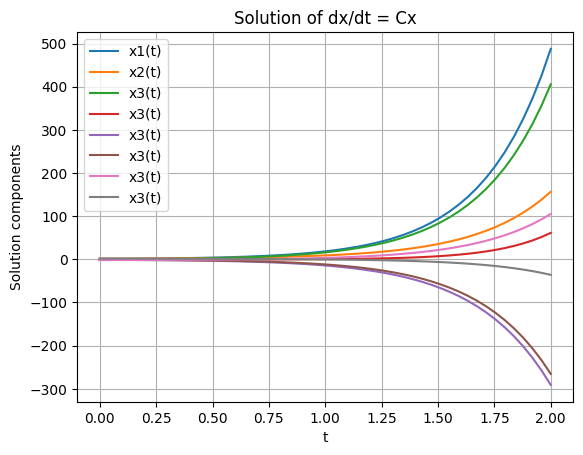

In [ ]:
plt.plot(times, solutions[:,0], label='x1(t)')
plt.plot(times, solutions[:,1], label='x2(t)')
plt.plot(times, solutions[:,2], label='x3(t)')
plt.plot(times, solutions[:,3], label='x3(t)')
plt.plot(times, solutions[:,4], label='x3(t)')
plt.plot(times, solutions[:,5], label='x3(t)')
plt.plot(times, solutions[:,6], label='x3(t)')
plt.plot(times, solutions[:,7], label='x3(t)')
plt.xlabel("t")
plt.ylabel("Solution components")
plt.title("Solution of dx/dt = Cx")
plt.legend()
plt.grid(True)
plt.show()

solutions is a 2D array of shape (50, 8) (50 time points × 8 components).solutions[:,0] selects the first component 
x1(t) for all times.Similarly, solutions[:,1] is x2(t) and solutions[:,2] is x3(t).
plt.plot(x, y, label='...') plots y vs x and assigns a label for the legend.

### A8 Kronecker Product and Vectorization


In [ ]:
K = np.kron(A,B)
K

array([[12,  9, 12, 32, 24, 32, 36, 27, 36],
       [ 3, 18,  6,  8, 48, 16,  9, 54, 18],
       [24, 18, 12, 64, 48, 32, 72, 54, 36],
       [36, 27, 36, 16, 12, 16,  8,  6,  8],
       [ 9, 54, 18,  4, 24,  8,  2, 12,  4],
       [72, 54, 36, 32, 24, 16, 16, 12,  8],
       [ 0,  0,  0, 24, 18, 24, 36, 27, 36],
       [ 0,  0,  0,  6, 36, 12,  9, 54, 18],
       [ 0,  0,  0, 48, 36, 24, 72, 54, 36]])

In [ ]:
A_rank = np.linalg.matrix_rank(A)
B_rank = np.linalg.matrix_rank(B)
K_rank = np.linalg.matrix_rank(K)
K_rank == A_rank*B_rank

np.True_

This proves Rank( A cross B) = rank(A)*rank(B)

In [ ]:
X_true = np.random.randint(-1,4,9).reshape(3,3)
C = A @ X_true @ B

# vec(C) in column-major (Fortran) order
vecC = C.reshape(-1, order='F')

# Build M = (B^T ⊗ A)
M = np.kron(B.T, A)

# Solve M vec(X) = vec(C)
vecX = np.linalg.solve(M, vecC)

# Reshape back into 3×3 matrix
X_rec = vecX.reshape(X_true.shape, order='F')
X_rec

array([[-1.77635684e-16,  0.00000000e+00,  3.94745964e-16],
       [ 8.43769499e-16,  0.00000000e+00,  3.00000000e+00],
       [ 3.00000000e+00, -1.00000000e+00, -1.00000000e+00]])

In [ ]:
eigA = np.linalg.eig(A)[0]
eigB = np.linalg.eig(B)[0]
eigK = np.linalg.eig(K)[0]


In [ ]:
pairwise = np.kron(eigA, eigB)
np.allclose(sorted(pairwise),sorted(eigK))

True

Calculated all eigen values even K for checking if the value matches. Then Pairwise product by using kronecker prodcut for calculating the eigen vlaues

### A7 Generalized EigenValue Problems

In [ ]:
import numpy as np
np.random.seed(0)
n = 5
B = np.random.randn(n, n)
alpha = n
M = B.T @ B + alpha * np.eye(n)

eigvals_M = np.linalg.eigvalsh(M)
is_spd = np.all(eigvals_M > 0)
is_spd


np.True_

In [ ]:
L = np.linalg.cholesky(M)
L_inv = np.linalg.inv(L)
A_trans = L_inv @ C @ L_inv.T

In [ ]:
eigvals, eigvecs_y = np.linalg.eigh(A_trans)
eigvals

array([-0.14121723,  0.04088988,  0.11090458,  0.17172256,  0.21857283])

In [ ]:
eigvecs_v = np.linalg.solve(L.T, eigvecs_y)
eigvecs_v

array([[-0.18328375, -0.07209472, -0.15862492,  0.15309852,  0.07315007],
       [-0.16409356, -0.07120352,  0.23345065,  0.09865152, -0.03766356],
       [ 0.10616068,  0.30845997,  0.00414276,  0.24473357,  0.04196003],
       [ 0.27908   , -0.14073847,  0.06131307,  0.03241782, -0.18276976],
       [-0.00205498, -0.15411299, -0.01365884, -0.03110623,  0.25798323]])

In [ ]:
Mnorms = np.sqrt(np.sum(eigvecs_v * (M @ eigvecs_v), axis=0))
eigvecs_v = eigvecs_v / Mnorms
eigvecs_v


array([[-0.18328375, -0.07209472, -0.15862492,  0.15309852,  0.07315007],
       [-0.16409356, -0.07120352,  0.23345065,  0.09865152, -0.03766356],
       [ 0.10616068,  0.30845997,  0.00414276,  0.24473357,  0.04196003],
       [ 0.27908   , -0.14073847,  0.06131307,  0.03241782, -0.18276976],
       [-0.00205498, -0.15411299, -0.01365884, -0.03110623,  0.25798323]])

In [ ]:
residuals = np.linalg.norm(C @ eigvecs_v - (M @ eigvecs_v) * eigvals.reshape(1, -1), axis=0)
np.max(residuals)

np.float64(4.652682298944613e-16)

In [ ]:
M_orth_check = eigvecs_v.T @ (M @ eigvecs_v)
M_orth_check

array([[ 1.00000000e+00, -4.75724576e-17,  1.03192172e-16,
         1.81824581e-16,  2.55666547e-16],
       [ 9.52403928e-18,  1.00000000e+00,  3.67516219e-18,
        -3.96519883e-17,  1.68331944e-16],
       [ 1.76321554e-16, -5.54620060e-18,  1.00000000e+00,
        -5.87376746e-16, -1.03382337e-17],
       [ 1.79139072e-16, -1.56756256e-16, -5.87223406e-16,
         1.00000000e+00, -1.04201626e-16],
       [ 1.66533454e-16,  1.66533454e-16, -6.93889390e-17,
        -1.66533454e-16,  1.00000000e+00]])

In [ ]:
np.max(np.abs(M_orth_check - np.diag(np.diag(M_orth_check))))

np.float64(5.873767457624462e-16)

### A9 Matrix Sensitivity Analysis

### A9 Matrix Sensitivity Analysis

In [ ]:
eps = 1e-6

E = np.random.randn(*C.shape)
E = E / np.linalg.norm(E, 'fro')

C_tilde = C + eps * E
C_tilde

array([[ 1.76405212, -0.28856024,  0.56139065,  1.28728346, -0.34271592],
       [-0.28856023,  0.95008843,  0.65145823,  0.69542995,  0.53210846],
       [ 0.5613906 ,  0.65145806,  0.76103752, -0.04174207,  0.65414976],
       [ 1.28728366,  0.69542969, -0.0417415 ,  0.31306747, -0.79813037],
       [-0.34271573,  0.53210858,  0.65415001, -0.7981307 ,  2.26975473]])

Here E is the random noise with frobenius norm 1

In [ ]:
eig_C = np.linalg.eigvals(C)
eig_Ctilde = np.linalg.eigvals(C_tilde)

In [ ]:
rel_err_eigs = np.abs(eig_Ctilde - eig_C) / np.abs(eig_C)
print("Relative eigenvalue errors:\n", rel_err_eigs)

Relative eigenvalue errors:
 [1.22209712e-07 1.15941721e-08 1.19324499e-07 1.03332743e-07
 8.55642781e-07]


In [ ]:
maximum_rel_error = max(rel_err_eigs)
maximum_rel_error

np.float64(8.556427808843742e-07)

In [ ]:
det_C = np.linalg.det(C)
det_Ctilde = np.linalg.det(C_tilde)

rel_det_err = np.abs(det_Ctilde - det_C) / np.abs(det_C)
print("Relative determinant error:", rel_det_err)

Relative determinant error: 1.2121035624799911e-06


In [ ]:
cond_C = np.linalg.cond(C)
print("Condition number of C:", cond_C)

Condition number of C: 12.042161978474237


Interpretation (you add this in your report):

Matrices with large condition number have eigenvalues and determinant that are highly sensitive to tiny perturbations.

If cond(C) is large, even ε = 1e−6 noise can cause large relative errors.

If cond(C) is small, C is well-conditioned and errors stay ≈ ε.

Here C is in the range of 10-10^2 so it is well conditioned that is why the noise did not cause big errors

### A10 Advanced Visualization and Analysis

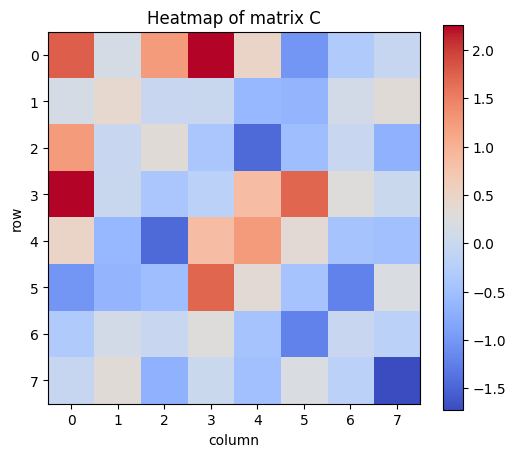

In [ ]:
np.random.seed(0)
A = np.random.randn(8, 8)
C = (A + A.T) / 2

plt.figure(figsize=(6,5))
plt.imshow(C, cmap= 'coolwarm',interpolation='nearest')
plt.title("Heatmap of matrix C")
plt.colorbar()
plt.xlabel("column")
plt.ylabel("row")
plt.show()


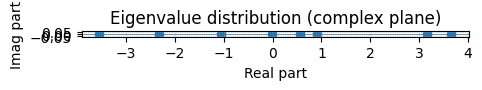

In [ ]:
eigvals = np.linalg.eigvals(C) 

plt.figure(figsize=(5,5))
plt.axhline(0, linewidth=0.5)
plt.axvline(0, linewidth=0.5)
plt.scatter(eigvals.real, eigvals.imag)
plt.title("Eigenvalue distribution (complex plane)")
plt.xlabel("Real part")
plt.ylabel("Imag part")
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, linestyle=':', linewidth=0.5)
plt.show()


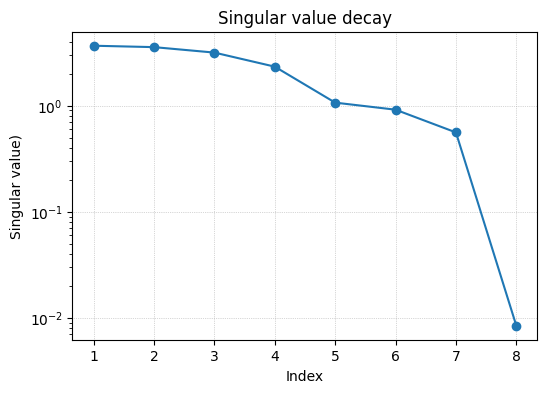

In [ ]:
U, s, Vt = np.linalg.svd(C, full_matrices=False)
plt.figure(figsize=(6,4))
plt.semilogy(np.arange(1, len(s)+1), s, marker='o')
plt.title("Singular value decay")
plt.xlabel("Index")
plt.ylabel("Singular value)")
plt.grid(True, linestyle=':', linewidth=0.5)
plt.show()
